In [113]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

from util import add_fill_lines

In [114]:
font = {'weight' : 'normal', 'size' : 15}

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

plt.rc('font', **font)

In [115]:
colors = {}

colors['Bio-CCA'] = 'tab:blue'
colors['MSG-CCA'] = 'tab:orange'
colors['Gen-Oja'] = 'tab:green'
colors['Asymmetric-CCA'] = 'tab:red'
colors['Bio-RRR'] = 'tab:purple'
colors['Adaptive Bio-CCA'] = 'tab:cyan'

In [116]:
styles = {}

styles['Bio-CCA'] = 'solid'
styles['MSG-CCA'] = 'dashed'
styles['Gen-Oja'] = 'dotted'
styles['Asymmetric-CCA'] = 'dashdot'
styles['Bio-RRR'] = 'dashed'
styles['Adaptive Bio-CCA'] = 'solid'

In [117]:
labels = {}

labels['Bio-CCA'] = 'Bio-CCA'
labels['MSG-CCA'] = 'MSG-CCA'
labels['Gen-Oja'] = 'Gen-Oja'
labels['Asymmetric-CCA'] = 'Asym-NN'
labels['Bio-RRR'] = 'Bio-RRR'
labels['Adaptive Bio-CCA'] = 'Adaptive Bio-CCA'

# Bio-CCA

### Synthetic plots

In [6]:
synthetic_error_1 = pkl.load(open('error/synthetic_1-dim_objective_error.p', 'rb'))
synthetic_subspacex_error_1 = pkl.load(open('error/synthetic_1-dim_subspacex_error.p', 'rb'))
synthetic_time_1 = pkl.load(open('error/synthetic_1-dim_time.p', 'rb'))
synthetic_error_2 = pkl.load(open('error/synthetic_2-dim_objective_error.p', 'rb'))
synthetic_subspacex_error_2 = pkl.load(open('error/synthetic_2-dim_subspacex_error.p', 'rb'))
synthetic_time_2 = pkl.load(open('error/synthetic_2-dim_time.p', 'rb'))
synthetic_error_4 = pkl.load(open('error/synthetic_4-dim_objective_error.p', 'rb'))
synthetic_subspacex_error_4 = pkl.load(open('error/synthetic_4-dim_subspacex_error.p', 'rb'))
synthetic_time_4 = pkl.load(open('error/synthetic_4-dim_time.p', 'rb'))

In [7]:
domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))

KeyError: 'Bio-CCA'

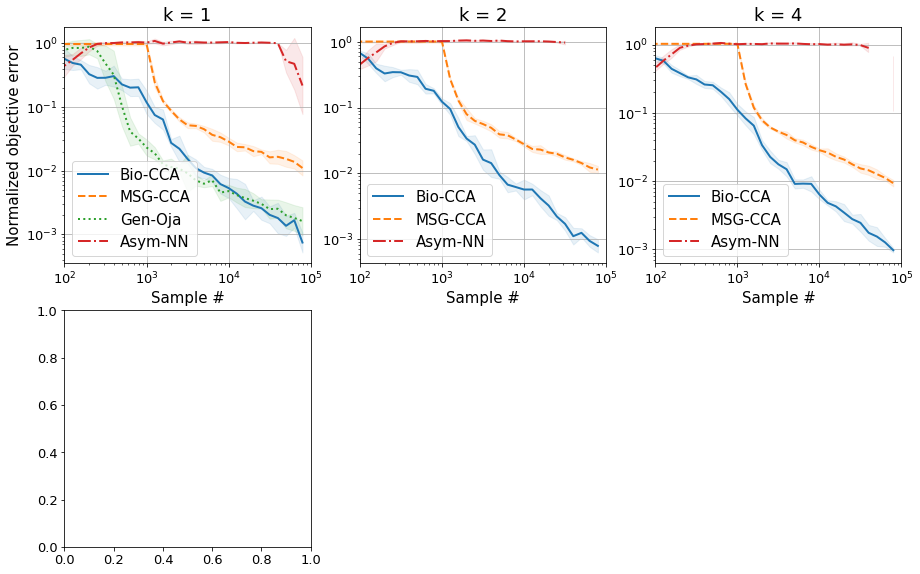

In [8]:
algorithms = ['Bio-CCA','MSG-CCA','Gen-Oja','Asymmetric-CCA','Bio-RRR']

linewidth = 2

iters = 100000

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,20))

ax = plt.subplot(4, 3, 1)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, domain, synthetic_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 2)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 3)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 4")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 4)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, np.mean(synthetic_time_1[alg][:,domain],axis=0), synthetic_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 5)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_2[alg][:,domain],axis=0), synthetic_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 6)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_4[alg][:,domain],axis=0), synthetic_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 7)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, domain, synthetic_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})
        
ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 8)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 9)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 10)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, np.mean(synthetic_time_1[alg][:,domain],axis=0), synthetic_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 11)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_2[alg][:,domain],axis=0), synthetic_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 12)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_4[alg][:,domain],axis=0), synthetic_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

plt.savefig(f'plots/synthetic.png', dpi=300, transparent='true', bbox_inches='tight')

##### Constraint error

In [199]:
synthetic_constraint_1 = pkl.load(open(f'error/synthetic_1-dim_biocca_constraint_error.p', 'rb'))
synthetic_constraint_2 = pkl.load(open(f'error/synthetic_2-dim_biocca_constraint_error.p', 'rb'))
synthetic_constraint_4 = pkl.load(open(f'error/synthetic_4-dim_biocca_constraint_error.p', 'rb'))

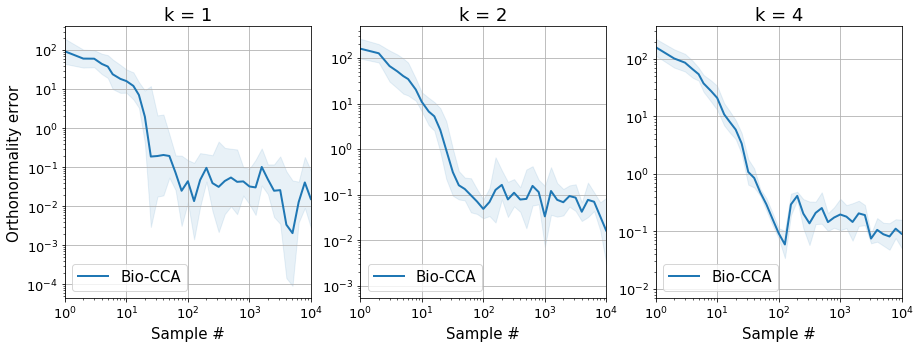

In [201]:
linewidth = 2

iters = 10000

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)

add_fill_lines(ax, domain, synthetic_constraint_1[:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA', 'color': 'tab:blue'}, ci_kwargs={'color': 'tab:blue'})

ax.loglog()

plt.title(f"k = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')
plt.ylabel('Orthonormality error')

ax = plt.subplot(1, 3, 2)

add_fill_lines(ax, domain, synthetic_constraint_2[:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA', 'color': 'tab:blue'}, ci_kwargs={'color': 'tab:blue'})

ax.loglog()

plt.title(f"k = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

ax = plt.subplot(1, 3, 3)

add_fill_lines(ax, domain, synthetic_constraint_4[:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA', 'color': 'tab:blue'}, ci_kwargs={'color': 'tab:blue'})

ax.loglog()

plt.title(f"k = 4")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

plt.savefig(f'plots/synthetic_biocca_constraint.png', dpi=300, transparent='true', bbox_inches='tight')

### Mediamill plots

In [190]:
mediamill_error_1 = pkl.load(open(f'error/mediamill_1-dim_objective_error.p', 'rb'))
mediamill_subspacex_error_1 = pkl.load(open(f'error/mediamill_1-dim_subspacex_error.p', 'rb'))
mediamill_time_1 = pkl.load(open(f'error/mediamill_1-dim_time.p', 'rb'))
mediamill_error_2 = pkl.load(open(f'error/mediamill_2-dim_objective_error.p', 'rb'))
mediamill_subspacex_error_2 = pkl.load(open(f'error/mediamill_2-dim_subspacex_error.p', 'rb'))
mediamill_time_2 = pkl.load(open(f'error/mediamill_2-dim_time.p', 'rb'))
mediamill_error_4 = pkl.load(open(f'error/mediamill_4-dim_objective_error.p', 'rb'))
mediamill_subspacex_error_4 = pkl.load(open(f'error/mediamill_4-dim_subspacex_error.p', 'rb'))
mediamill_time_4 = pkl.load(open(f'error/mediamill_4-dim_time.p', 'rb'))

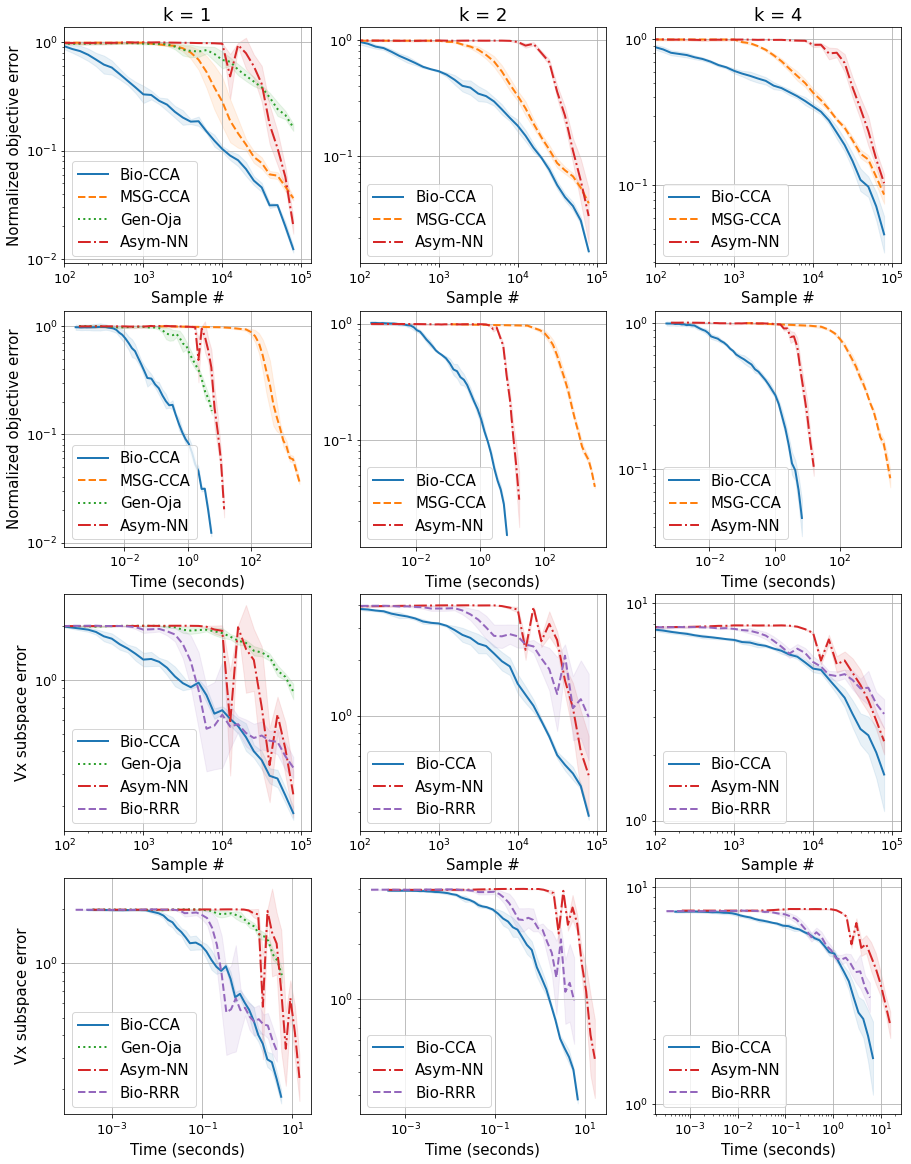

In [153]:
algorithms = ['Bio-CCA','MSG-CCA','Gen-Oja','Asymmetric-CCA','Bio-RRR']

linewidth = 2

iters = 43907*3

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5.12, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,20))

ax = plt.subplot(4, 3, 1)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, domain, mediamill_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 2)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 3)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 4")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 4)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, np.mean(mediamill_time_1[alg][:,domain],axis=0), mediamill_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 5)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_2[alg][:,domain],axis=0), mediamill_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 6)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_4[alg][:,domain],axis=0), mediamill_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 7)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, domain, mediamill_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})
        
ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 8)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 9)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylim((9e-1,1.1e1))

ax = plt.subplot(4, 3, 10)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, np.mean(mediamill_time_1[alg][:,domain],axis=0), mediamill_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 11)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_2[alg][:,domain],axis=0), mediamill_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 12)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_4[alg][:,domain],axis=0), mediamill_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylim((9e-1,1.1e1))

plt.savefig(f'plots/mediamill.png', dpi=300, transparent='true', bbox_inches='tight')

##### Constraint error

In [193]:
mediamill_constraint_1 = pkl.load(open(f'error/mediamill_1-dim_biocca_constraint_error.p', 'rb'))
mediamill_constraint_2 = pkl.load(open(f'error/mediamill_2-dim_biocca_constraint_error.p', 'rb'))
mediamill_constraint_4 = pkl.load(open(f'error/mediamill_4-dim_biocca_constraint_error.p', 'rb'))

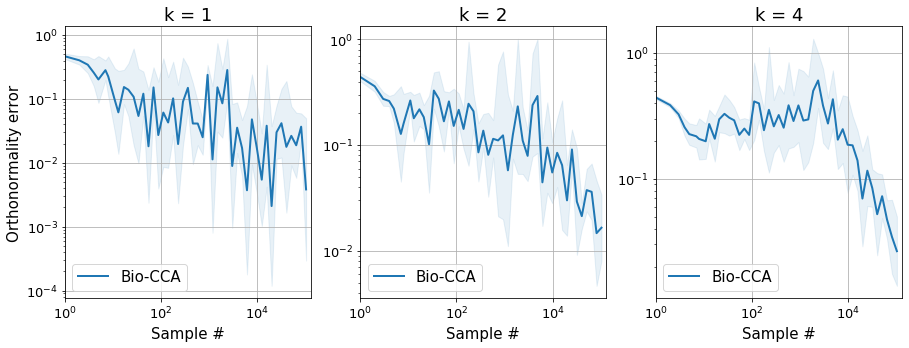

In [202]:
linewidth = 2

iters = 43907*3

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5.12, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)

add_fill_lines(ax, domain, mediamill_constraint_1[:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA', 'color': 'tab:blue'}, ci_kwargs={'color': 'tab:blue'})

ax.loglog()

plt.title(f"k = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')
plt.ylabel('Orthonormality error')

ax = plt.subplot(1, 3, 2)

add_fill_lines(ax, domain, mediamill_constraint_2[:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA', 'color': 'tab:blue'}, ci_kwargs={'color': 'tab:blue'})

ax.loglog()

plt.title(f"k = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

ax = plt.subplot(1, 3, 3)

add_fill_lines(ax, domain, mediamill_constraint_4[:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA', 'color': 'tab:blue'}, ci_kwargs={'color': 'tab:blue'})

ax.loglog()

plt.title(f"k = 4")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

plt.savefig(f'plots/mediamill_biocca_constraint.png', dpi=300, transparent='true', bbox_inches='tight')

# Adaptive Bio-CCA with output whitening

### Synthetic plots

In [118]:
adaptive_synthetic_subspacex_error_1 = pkl.load(open('error/adaptive_synthetic_alpha-1.2_10-dim_subspacex_error.p', 'rb'))
adaptive_synthetic_time_1 = pkl.load(open('error/adaptive_synthetic_alpha-1.2_10-dim_time.p', 'rb'))
adaptive_synthetic_subspacex_error_2 = pkl.load(open('error/adaptive_synthetic_alpha-1.5_10-dim_subspacex_error.p', 'rb'))
adaptive_synthetic_time_2 = pkl.load(open('error/adaptive_synthetic_alpha-1.5_10-dim_time.p', 'rb'))
adaptive_synthetic_subspacex_error_3 = pkl.load(open('error/adaptive_synthetic_alpha-1.8_10-dim_subspacex_error.p', 'rb'))
adaptive_synthetic_time_3 = pkl.load(open('error/adaptive_synthetic_alpha-1.8_10-dim_time.p', 'rb'))

In [119]:
domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))

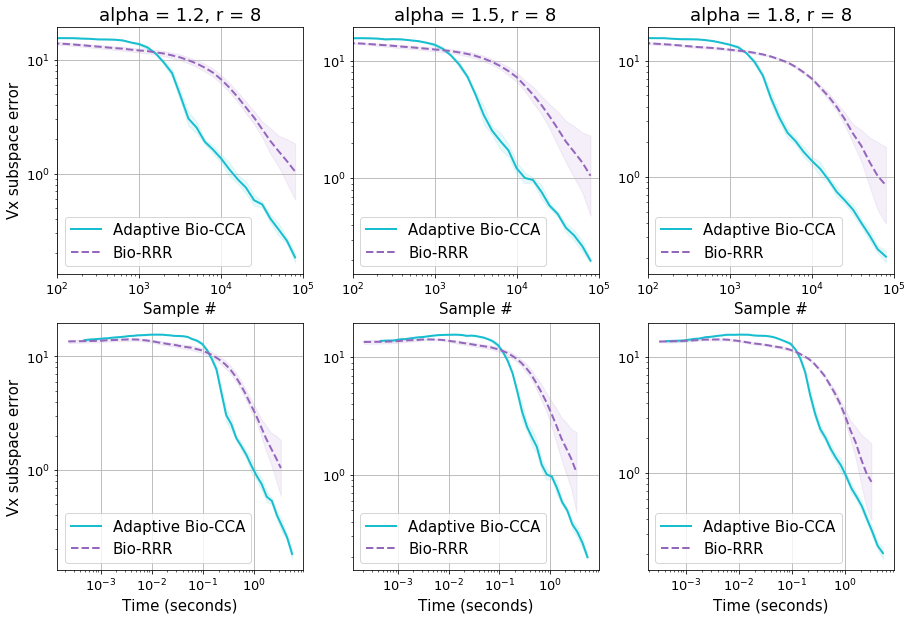

In [153]:
algorithms = ['Adaptive Bio-CCA','Bio-RRR']

linewidth = 2

iters = 100000

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2, 3, 1)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, domain, adaptive_synthetic_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})
        
ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')
plt.title('alpha = 1.2, r = 8')

ax = plt.subplot(2, 3, 2)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, adaptive_synthetic_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.title('alpha = 1.5, r = 8')

ax = plt.subplot(2, 3, 3)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, adaptive_synthetic_subspacex_error_3[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.title('alpha = 1.8, r = 8')

ax = plt.subplot(2, 3, 4)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, np.mean(adaptive_synthetic_time_1[alg][:,domain],axis=0), adaptive_synthetic_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Vx subspace error')

ax = plt.subplot(2, 3, 5)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(adaptive_synthetic_time_2[alg][:,domain],axis=0), adaptive_synthetic_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(2, 3, 6)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(adaptive_synthetic_time_3[alg][:,domain],axis=0), adaptive_synthetic_subspacex_error_3[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

plt.savefig(f'plots/adaptive_synthetic.png', dpi=300, transparent='true', bbox_inches='tight')

##### Constraint error

In [219]:
adaptive_synthetic_constraint_1 = pkl.load(open(f'error/adaptive_synthetic_alpha-1.2_10-dim_whitening_error.p', 'rb'))
adaptive_synthetic_constraint_2 = pkl.load(open(f'error/adaptive_synthetic_alpha-1.5_10-dim_whitening_error.p', 'rb'))
adaptive_synthetic_constraint_3 = pkl.load(open(f'error/adaptive_synthetic_alpha-1.8_10-dim_whitening_error.p', 'rb'))

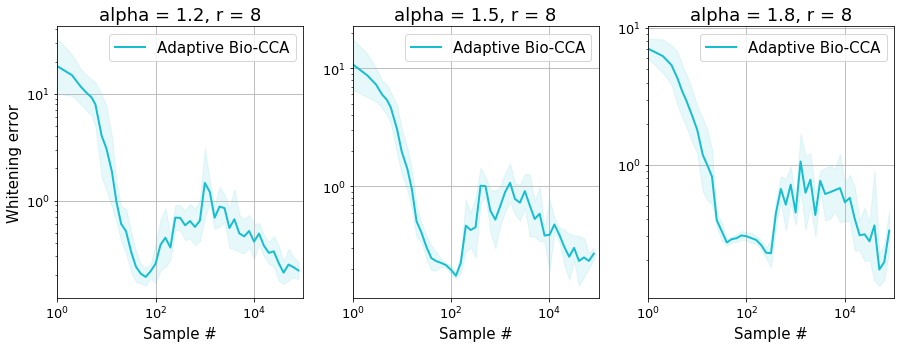

In [225]:
linewidth = 2

iters = 100000

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)

add_fill_lines(ax, domain, adaptive_synthetic_constraint_1['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.loglog()

plt.title(f"alpha = 1.2, r = 8")
plt.grid()
plt.legend(loc = 'upper right')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')
plt.ylabel('Whitening error')

ax = plt.subplot(1, 3, 2)

add_fill_lines(ax, domain, adaptive_synthetic_constraint_2['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.loglog()

plt.title(f"alpha = 1.5, r = 8")
plt.grid()
plt.legend(loc = 'upper right')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

ax = plt.subplot(1, 3, 3)

add_fill_lines(ax, domain, adaptive_synthetic_constraint_3['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.loglog()

plt.title(f"alpha = 1.8, r = 8")
plt.grid()
plt.legend(loc = 'upper right')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

plt.savefig(f'plots/adaptive_synthetic_constraint.png', dpi=300, transparent='true', bbox_inches='tight')

### Mediamill plots

In [150]:
adaptive_mediamill_subspacex_error_1 = pkl.load(open('error/adaptive_mediamill_alpha-1.15_10-dim_subspacex_error.p', 'rb'))
adaptive_mediamill_time_1 = pkl.load(open('error/adaptive_mediamill_alpha-1.15_10-dim_time.p', 'rb'))
adaptive_mediamill_subspacex_error_2 = pkl.load(open('error/adaptive_mediamill_alpha-1.2_10-dim_subspacex_error.p', 'rb'))
adaptive_mediamill_time_2 = pkl.load(open('error/adaptive_mediamill_alpha-1.2_10-dim_time.p', 'rb'))
adaptive_mediamill_subspacex_error_3 = pkl.load(open('error/adaptive_mediamill_alpha-1.3_10-dim_subspacex_error.p', 'rb'))
adaptive_mediamill_time_3 = pkl.load(open('error/adaptive_mediamill_alpha-1.3_10-dim_time.p', 'rb'))

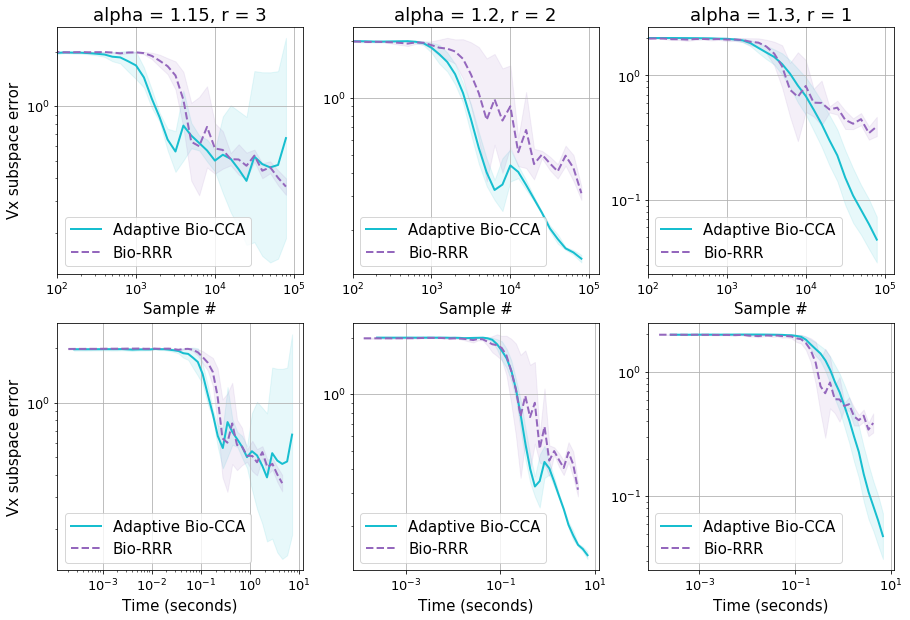

In [152]:
algorithms = ['Adaptive Bio-CCA','Bio-RRR']

linewidth = 2

iters = 43907*3

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2, 3, 1)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, domain, adaptive_mediamill_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})
        
ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')
plt.title('alpha = 1.15, r = 3')

ax = plt.subplot(2, 3, 2)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, adaptive_mediamill_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.title('alpha = 1.2, r = 2')

ax = plt.subplot(2, 3, 3)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, adaptive_mediamill_subspacex_error_3[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.title('alpha = 1.3, r = 1')

ax = plt.subplot(2, 3, 4)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, np.mean(adaptive_mediamill_time_1[alg][:,domain],axis=0), adaptive_mediamill_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Vx subspace error')

ax = plt.subplot(2, 3, 5)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(adaptive_mediamill_time_2[alg][:,domain],axis=0), adaptive_mediamill_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(2, 3, 6)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(adaptive_mediamill_time_3[alg][:,domain],axis=0), adaptive_mediamill_subspacex_error_3[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

plt.savefig(f'plots/adaptive_mediamill.png', dpi=300, transparent='true', bbox_inches='tight')

In [64]:
adaptive_subspacex_error = pkl.load(open(f'error/adaptive_adaptive_alpha-1.5_10-dim_subspacex_error.p', 'rb'))
adaptive_rank = pkl.load(open(f'error/adaptive_adaptive_alpha-1.5_10-dim_rank.p', 'rb'))

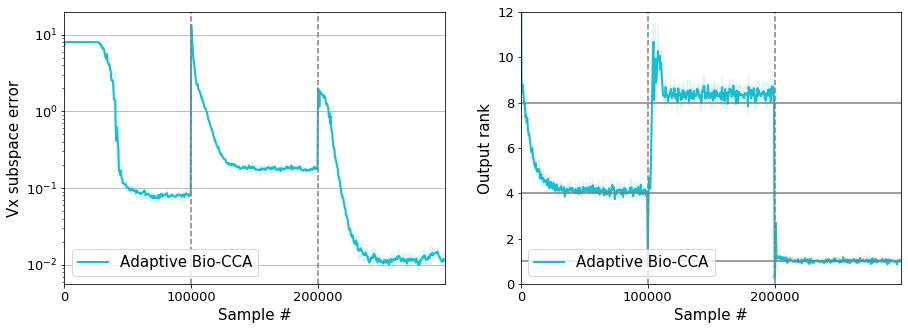

In [103]:
algorithms = ['Adaptive Bio-CCA']

linewidth = 2

iters = 300000

domain = list(sorted(set(map(int, np.round(np.linspace(0, iters, num=600, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1, 2, 1)

add_fill_lines(ax, domain, adaptive_subspacex_error['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.semilogy()

# plt.title(f"alpha = 1.5")
ax.set_xticks(np.arange(0,300000,100000))
plt.grid(axis='y')
plt.legend(loc = 'lower left')
plt.xlim((0,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')
plt.axvline(x=1e5, color='gray', ls='--')
plt.axvline(x=2e5, color='gray', ls='--')

ax = plt.subplot(1, 2, 2)

add_fill_lines(ax, domain, adaptive_rank['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.plot()

# plt.title(f"alpha = 1.5")
ax.set_xticks(np.arange(0,300000,100000))
# plt.grid(axis='x')
plt.legend(loc = 'lower left')
plt.xlim((0,iters))
plt.ylim((0,12))
plt.xlabel('Sample #')
plt.ylabel('Output rank')
plt.axvline(x=1e5, color='gray', ls='--')
plt.axvline(x=2e5, color='gray', ls='--')
plt.axhline(y=1, color='gray', ls='-')
plt.axhline(y=4, color='gray', ls='-')
plt.axhline(y=8, color='gray', ls='-')

plt.savefig(f'plots/adaptive.png', dpi=300, transparent='true', bbox_inches='tight')

##### Constraint error

In [212]:
adaptive_mediamill_constraint_1 = pkl.load(open(f'error/adaptive_mediamill_alpha-1.15_10-dim_whitening_error.p', 'rb'))
adaptive_mediamill_constraint_2 = pkl.load(open(f'error/adaptive_mediamill_alpha-1.2_10-dim_whitening_error.p', 'rb'))
# adaptive_mediamill_constraint_3 = pkl.load(open(f'error/adaptive_mediamill_alpha-1.3_10-dim_whitening_error.p', 'rb'))

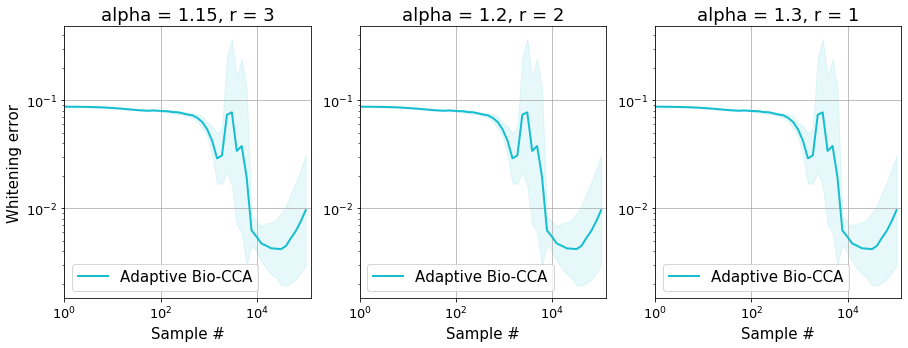

In [222]:
linewidth = 2

iters = 43907*3

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5.12, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)

add_fill_lines(ax, domain, adaptive_mediamill_constraint_1['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.loglog()

plt.title(f"alpha = 1.15, r = 3")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')
plt.ylabel('Whitening error')

ax = plt.subplot(1, 3, 2)

add_fill_lines(ax, domain, adaptive_mediamill_constraint_1['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.loglog()

plt.title(f"alpha = 1.2, r = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

ax = plt.subplot(1, 3, 3)

add_fill_lines(ax, domain, adaptive_mediamill_constraint_1['Adaptive Bio-CCA'][:,domain], plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Adaptive Bio-CCA', 'color': 'tab:cyan'}, ci_kwargs={'color': 'tab:cyan'})

ax.loglog()

plt.title(f"alpha = 1.3, r = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e0,iters))
plt.xlabel('Sample #')

plt.savefig(f'plots/adaptive_mediamill_constraint.png', dpi=300, transparent='true', bbox_inches='tight')